In [26]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

##### The data contain the latest discussion topics on "Hacker News" from page1 to page100. 

In [61]:
df=pd.read_csv('latest.csv')
df['score'] = df['score'].map(lambda x: x.rstrip('points')).apply(lambda x:int(x))
df2 = df.sort_values(['time'])

### Tips:
##### The lambda is to make sure we can sort the values.

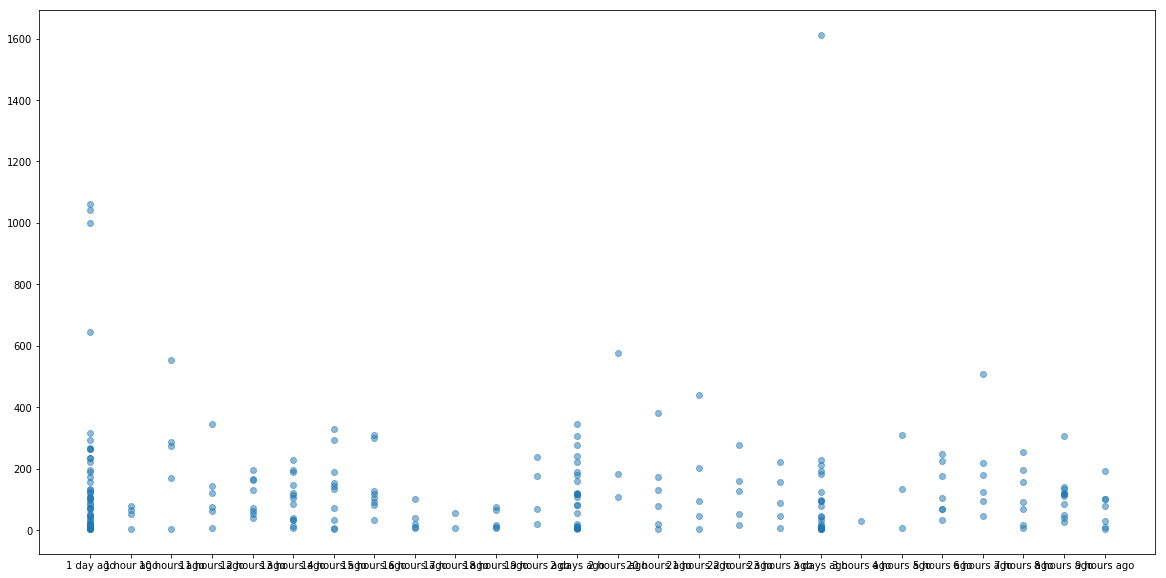

In [66]:
plt.figure(figsize=(20, 10))
plt.scatter(df2['time'],df2['score'], alpha=0.5,label='score')

In [70]:
over600=df[df['score']>600]['title']
over600

107    The Subway Is So Late, It’s Making New Yorkers...
109    Robert Langlands, who linked number theory, an...
110    Comcast, AT&T; and Verizon pose a greater surv...
158                      Technicopedia: 8880 – Super Car
211            Show HN: A generator for random ASCIItabs
Name: title, dtype: object

### News: 
#####  what is the hottest topic? The participants are talking about which aspect? or what kind of participants are interested in that? Find out what 's the common characteristic.

In [5]:
below100=df[df['score']< 100 ]
below100.head(5)

,title,score,time
2,Apple now globally powered by 100 percent rene...,77,1 hour ago
6,RFC 7858: DNS over TLS (2016),92,7 hours ago
8,Ask HN: Do you have the courage to abandon you...,51,1 hour ago
13,Mythology About Security,68,7 hours ago
14,Solid ship ballast from the age of sail tells ...,34,5 hours ago


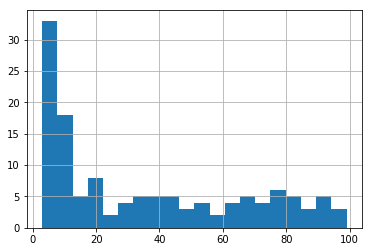

In [6]:
below100['score'].hist(bins=20)

<Container object of 61 artists>

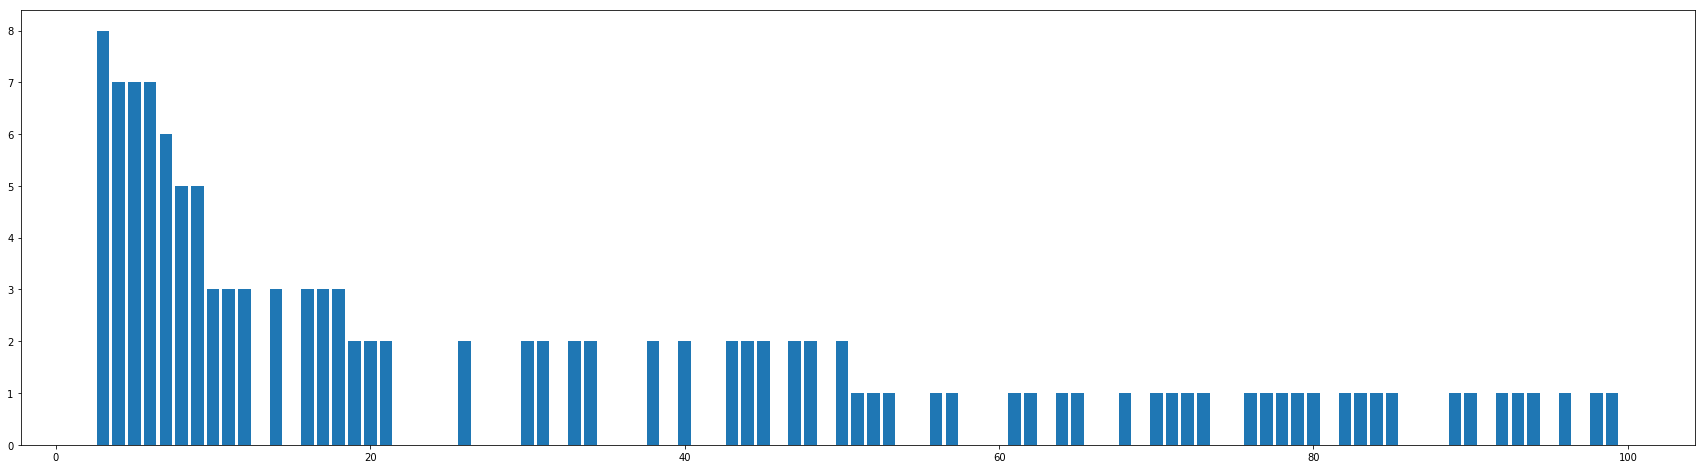

In [7]:
fig = plt.figure(figsize=(30, 8))
area_counts =below100['score'].value_counts()
plt.bar(area_counts.index.sort_values(ascending = True), area_counts)

In [8]:
text=[]
word_count={}
for words in below100['title']:
    text.extend(words.split())
for word in text:
    if word not in word_count:
        word_count[word]=1
    else:
        word_count[word]=word_count[word]+1
table=pd.Series(word_count).to_frame().reset_index()
table.columns=['word','count']
table.sort_values(by='count',ascending=False).head(5)

,word,count
612,of,21
692,to,20
430,a,19
690,the,18
187,HN:,18


##### Those title, whose scores are below 100, are plenty. There are too many meaningless words. Following is to make a filter.

In [9]:
stop=set(['of','for','the','The','to','a','A','an','in','the','and',
                '–','by','what','How','with','how','from','on',
               'that','is','I','it','be','are','not'])
def OK(x):
    return x not in stop

table[
    table['word'].apply(OK)
].sort_values(by='count',ascending=False).head()

,word,count
187,HN:,18
54,Ask,10
337,Show,8
406,What,5
412,Why,5


##### In fact, there are many words count only once, which means that topics are diverse.
##### New data

In [10]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import csv
import nltk
#Following is to download the nltk
import ssl  
try:  
    _create_unverified_https_context = ssl._create_unverified_context  
except AttributeError:  
    pass  
else:  
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/p17444519/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
df=pd.read_csv('comments.csv')
df.sample(5)

,text,user
368,Whilst a VPN is an important and arguably now ...,StavrosK
123,"No type expert, but: << :: Int -> Int | Lon...",cakoose
442,I understand the inclination to do this - I th...,mdasen
475,The majority of currently tracked space debris...,pas
576,You can write the custom lambdas to rotate 3rd...,pyraz


In [12]:
#Split the words from the text 
all_text=[]
for words in df['text']:
    all_text.extend(words.split())
#Count the words
word_count={}
for word in all_text:
    if word not in word_count:
        word_count[word]=1
    else:
        word_count[word]=word_count[word]+1
#Convert 'word count' into a dataframe
table=pd.Series(word_count).to_frame().reset_index()
table.columns=['word','count']
table.sort_values(by='count',ascending=False)

stop_words=set(stopwords.words('english'))

def OK(x):
    return x not in stop_words

final_table=table[
    table['word'].apply(OK)
].sort_values(by='count',ascending=False)
final_table.head(5)

,word,count
990,I,546
5217,like,164
1511,The,136
8477,would,131
6116,people,108


In [13]:
cloud=final_table.reset_index()
del cloud['index']
#len(cloud)
cloud.head(5)
wcdata=cloud.set_index('word')['count'].to_dict()

,word,count
0,I,546
1,like,164
2,The,136
3,would,131
4,people,108


##### if we don't convert it into dict, the meaningless word won't be deleted in the word cloud.

(-0.5, 399.5, 199.5, -0.5)

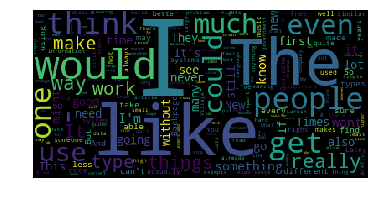

In [15]:
wc=WordCloud()
w=wc.generate_from_frequencies(wcdata)

plt.imshow(w)
plt.axis('off')

### News:
##### "like" "think"  "would" "many" "different"are those common words appear in the comments. Those words can convert to a sentence which means that commenter care about those issues.